# PROBLEM STETEMENT

# BUSINESS GOAL

## STEP 1: READING AND UNDERSTANDING THE DATA

Let us first import Numpy and Pandas and read the dataset

In [212]:
# importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')


In [213]:
# importing dataset 
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [214]:
# checking total rows and columns in dataset
leads.shape

(9240, 37)

In [215]:
# checking name of columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In this dataset:
* 9240 rows
* 37 columns

In [217]:
# checking basic information

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [218]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [219]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [220]:
# checking null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [221]:
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

## STEP 2: DATA CLEANING

In [223]:
# checking percentage of null values in each columns

leads.isna().sum()/leads.isna().count()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [224]:
# checking duplicate values in the dataset

leads[leads.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There is no duplicate values in the dataset

As we have noted the dataframe contains some select values it means these are the missing values

In [227]:
# Replacing the select values with nan values

leads = leads.replace('Select', np.nan)


In [228]:
# checking once again percentage of null values in each columns

leads.isna().sum()/leads.isna().count()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

There are lots of missing values

In [230]:
# Removing columns which contain more than 40% of missing values

cols_drop = leads.columns[round((leads.isnull().sum()/len(leads))*100)>=40]

leads = leads.drop(cols_drop, axis=1)

In [231]:
leads.isnull().sum().sort_values(ascending=False)

Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [232]:
# lets check whether columns are droped or not
leads.shape

(9240, 29)

In [233]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [234]:
leads.drop('Tags', axis = 1, inplace=True)

In [235]:
# finding the labels contains in country variable
leads['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [236]:
# Given that of the non-missing numbers, India occurs most frequently, so We can imput all missing values with India.

leads['Country'] = leads['Country'].replace(np.nan,'India')

In [237]:
# finding the labels contains in the specialization variables

leads['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [238]:
# importing 'Finace Management' as its common occurance in specialization column

leads['Specialization'] = leads['Specialization'].replace(np.nan,'Finance Management')

In [239]:
# finding the labels contains in the What is your current occupation variables

leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [240]:
# importing Unemployed as its common occurance in What is your current occupation column

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'What is your current occupation')

In [241]:
# finding the labels contains in the 'What matters most to you in choosing a course' variables

leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [242]:
# droping 'What matters most to you in choosing a course' as we have almost same values for columns

leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [243]:
# Finding the labels contains in the 'Last Activity' Variable

leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [244]:
# importing 'Email Opened' as its common occurance in Last Activity column

leads['Last Activity'] = leads['Last Activity'].fillna('Email Opened')

In [245]:
# finding the labels contains in the 'Lead Source' variable

leads['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [246]:
# importing 'Google' as its common occurance in Lead Source column

leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')


In [247]:
# here we have found that google and Google is same just a type hence we replaced it google to Google

leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [248]:
leads['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

### Outlier Detection

In [250]:
# ckecking outliers at 25%, 50%, 75%, 90%, 95% and above

leads.describe(percentiles=[.25, .50,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


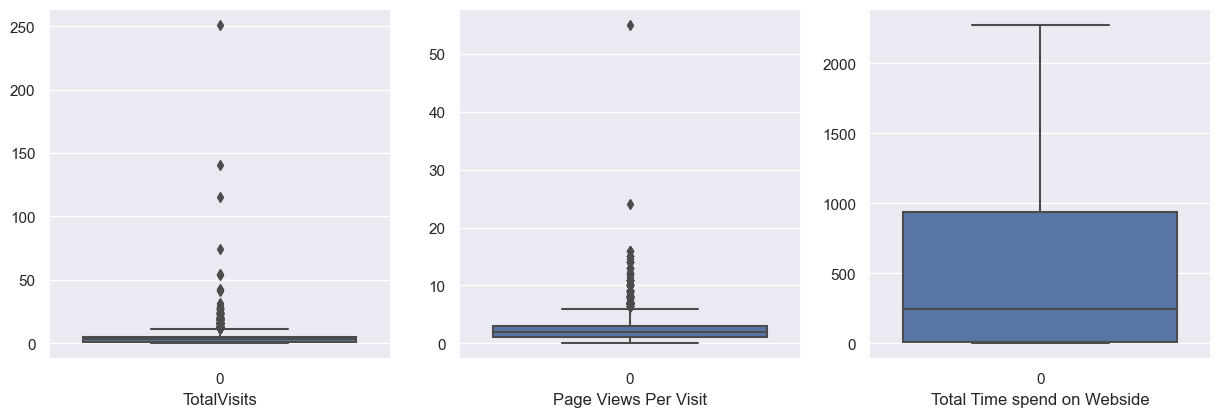

In [251]:
# finding the outliers

plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(leads['TotalVisits'])
plt.xlabel('TotalVisits')
plt.subplot(2,3,2)
sns.boxplot(leads['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')
plt.subplot(2,3,3)
sns.boxplot(leads['Total Time Spent on Website'])
plt.xlabel('Total Time spend on Webside')
plt.show()

Outliers are present in both the variables 'TotalVisits' and 'Page Views Per Visit' it should be treated and the value speaded above median highly in 'Total Time Spent on Website' 

Imputing Median to the Missing values

In [254]:
# importing median as it is a continueous type
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())

In [255]:
leads['TotalVisits'].describe(percentiles=[0.25,.50,.75,.90,.95,.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [256]:
leads[pd.isnull(leads).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Reinspecting Null Values

In [258]:
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

No null values are remaing in the dataset

In [260]:
# making lead number as index

leads = leads.set_index('Lead Number')
leads.drop(['Prospect ID'],axis=1, inplace=True)

In [261]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [262]:
num_data = round(100*(len(leads)/9240),2)
print(num_data)

100.0


At this point , tha data has been cleaned and around 100% of data has been cleaned

In [264]:
# Storing column with dtype object and column with dtype number in two different list so we can easily Perform analysis 

# Storing columns with dtype 'object' in one list
cols_obj = list(leads.select_dtypes(include=['object']).columns)

# Storing columns with numeric dtypes in another list
cols_num = list(leads.select_dtypes(include=[np.number]).columns)

In [265]:
print(cols_obj)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [266]:
print(cols_num)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


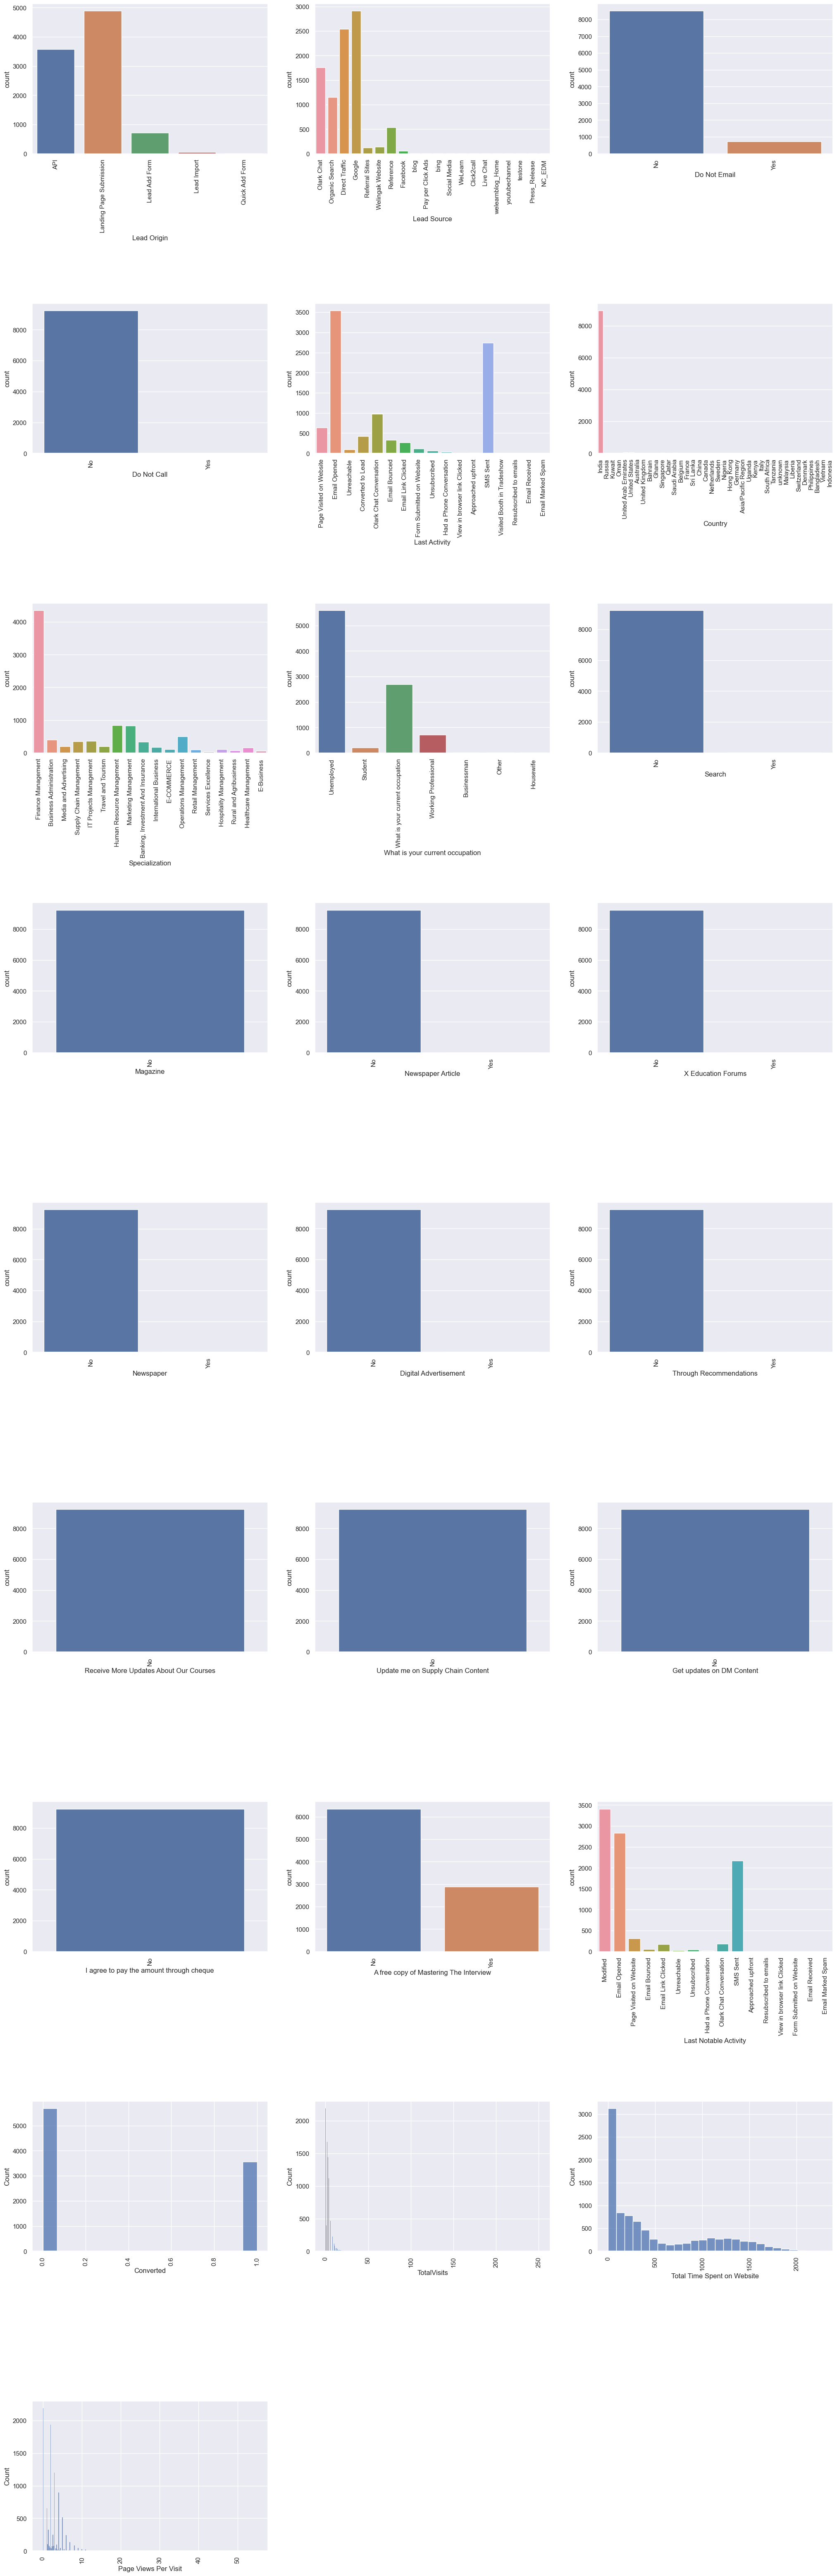

In [267]:
# ploting countplot for object dtype and histogram for number to get data distibution

plt.figure(figsize=(25, 80))
sns.set()
plt.subplots_adjust(wspace=0.2, hspace=1)

for i, col in enumerate(cols_obj + cols_num):
    plt.subplot(((len(cols_obj) + len(cols_num)) // 3) + 1, 3, i + 1)
    if col in cols_obj:
        sns.countplot(x=col, data=leads)
    else:
        sns.histplot(leads[col], kde=False)
    plt.xticks(rotation=90)
plt.show()

### Insights

* we can see that there are many columns which are highly skewed or only one values i.e  'Magazine' , so we can remove these columns as this wil not help in the model building.
* There are columns which have many categories(>5), here we can impute new value 'Other' for which are occured less.

Removing highly skewed variables and if column contains single labels

In [271]:
# Taking care of highly skewed columns and one value only

leads = leads.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search','X Education Forums','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [272]:
# Droping those variables which contains two labels but one is very high and another is very less number of labels
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)

cols_obj = leads.select_dtypes(include=['object']).columns

Maintaing the labels which column contains lots of labels

In [274]:
# Identify categories in 'Lead Source' that occur less than 1000 times
col_dict_ls = leads['Lead Source'].value_counts() < 1000

# Replace those categories with 'Other'
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for category, is_less_than_1000 in col_dict_ls.items():
    if is_less_than_1000:
        leads['Lead Source'] = leads['Lead Source'].replace(category, 'Other')

In [275]:
# changing categories which are occured less than 300 times

col_dict_la = leads['Last Activity'].value_counts() < 300

# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'
# replcing those categories with 'Other'

for category, is_less_than_300 in col_dict_la.items():
    if is_less_than_300:
        leads['Last Activity'] = leads['Last Activity'].replace(category, 'Other')

In [276]:
# changing categories which are occured less than 350

col_dict_spec = leads['Specialization'].value_counts() < 350

# labels which are occured less like E-Business,Retail Management we can impute to 'Other'
# replcing those categories with 'Other'

for category, is_less_than_350 in col_dict_spec.items():
    if is_less_than_350:
        leads['Specialization'] = leads['Specialization'].replace(category, 'Other')


In [277]:
# changing categories which are occured less than 500

col_dict_lna = leads['Last Notable Activity'].value_counts() < 500

# replcing those categories with 'Other'
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for category, is_less_than_500 in col_dict_lna.items():
    if is_less_than_500:
        leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(category, 'Other')

## STEP 3:  EXPLORATORY DATA ANALYSIS

Univariate Analysis (Categorical)

In [280]:
# creating columns which contains only categorical variables
cols = list(leads.select_dtypes(include=['object']).columns)
cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

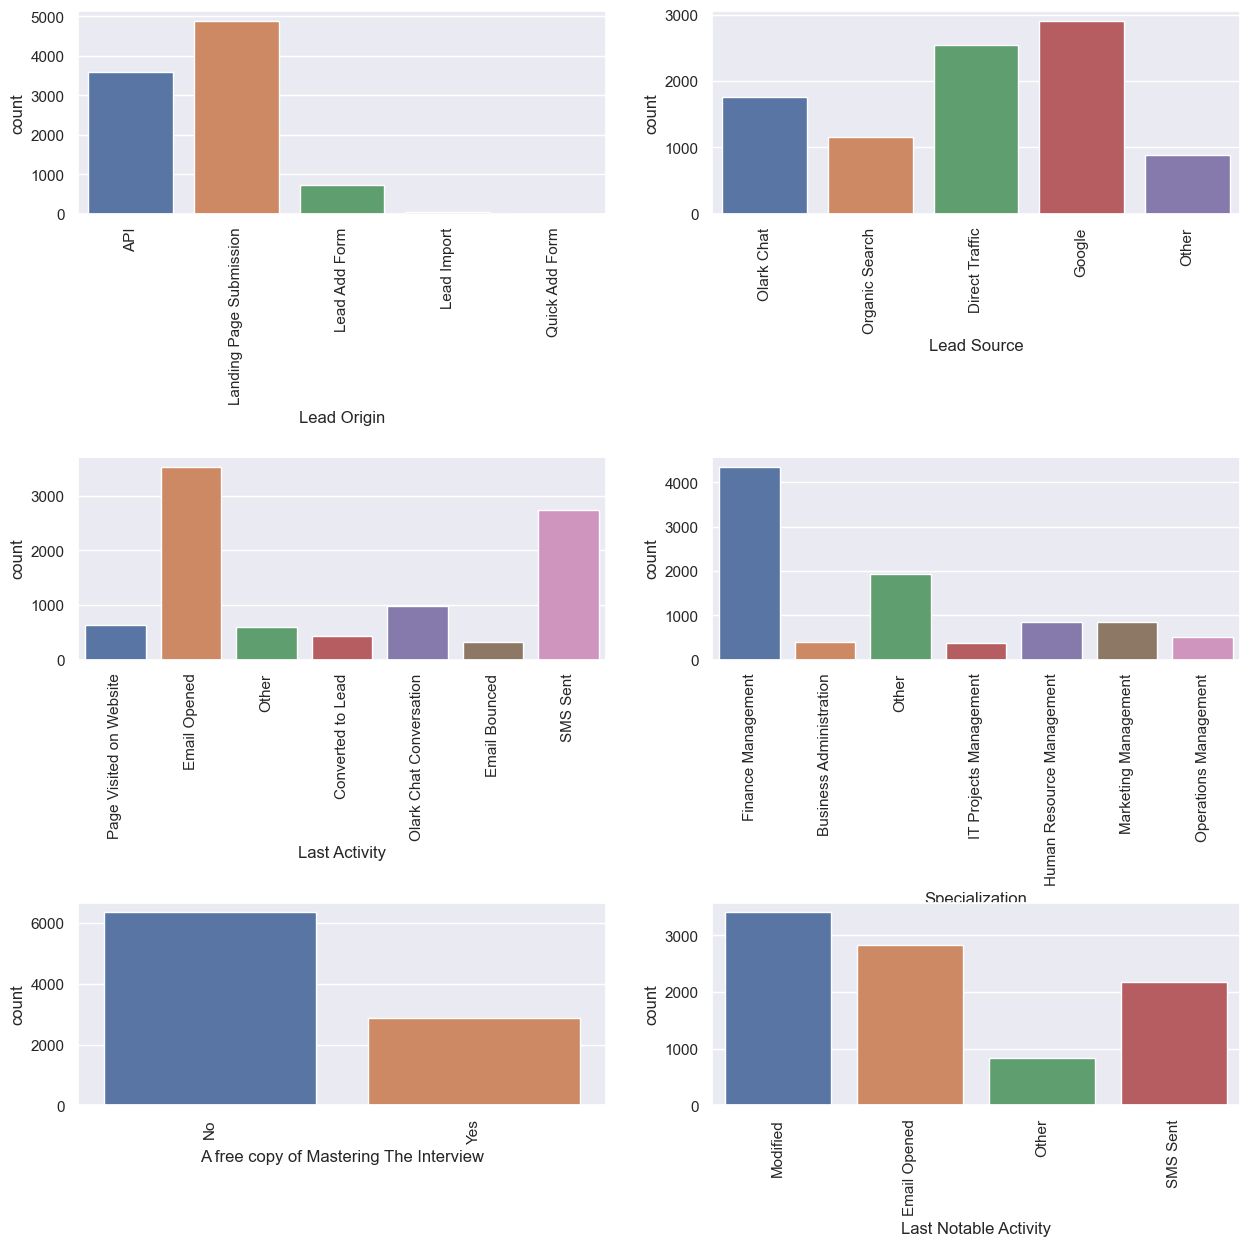

In [281]:
plt.figure(figsize=(15, 20))
sns.set()
plt.subplots_adjust(wspace=0.2, hspace=1.2)

# Iterate over the categorical columns and create count plots
for index, column_name in enumerate(cols):
    plt.subplot(4, 2, index + 1)  # Adjusting to 4 rows and 2 columns layout
    sns.countplot(x=column_name, data=leads)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

##### Insights-

- In Lead Source Direct Traffic and Google are the two main source for leads
- The number of values is high in Email Opened and SMS Sent in Last Activity
- Most of the people choose Finance Management in Specialization rather than other specialization
- The IT Project Management have very less so that most of the people not prefered this specialisation

### Univariate Analysis(Contenious)

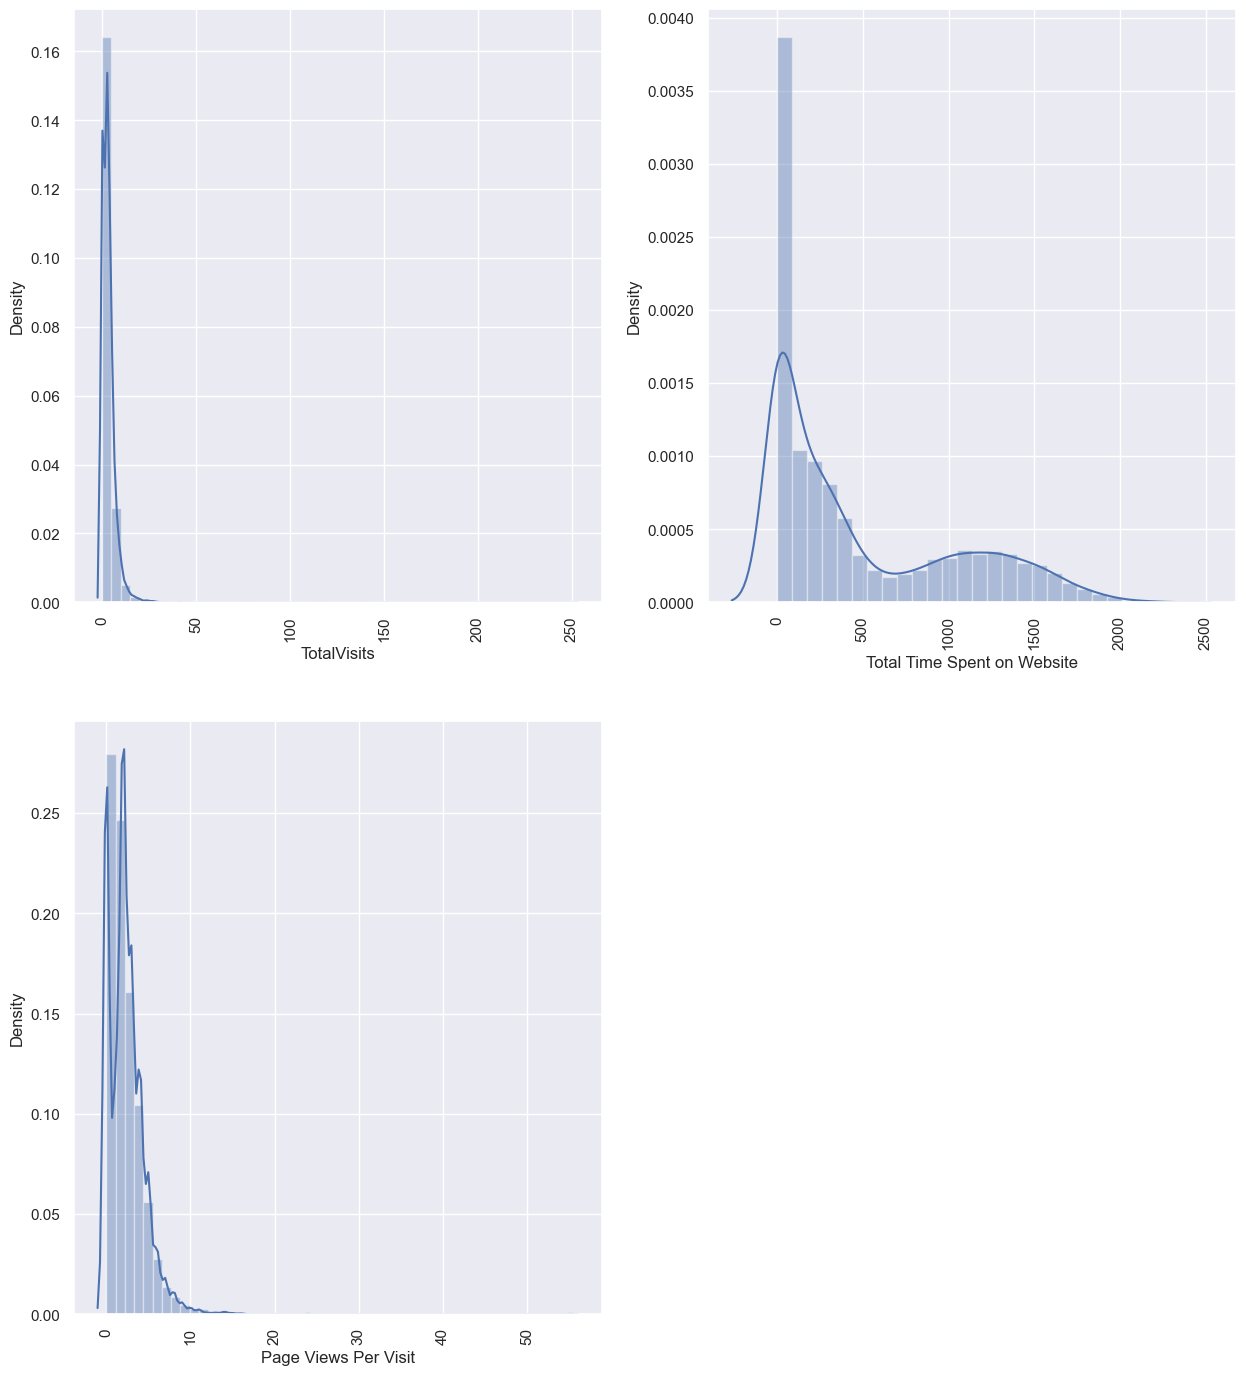

In [285]:
# removing the 'Converted' column from the list of numeric columns
cols_num.remove('Converted')

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(cols_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(leads[i[1]])
    
    plt.xticks(rotation=90)
# plt.savefig('coniouus_univar.png',dpi=300,transparent=True)
plt.show()

### Insights:

- None of the Continueose variables are in normal distribution
- Presence of outliers in Total Visits and Page Views per Visit
- In total visits more values is between 0-50 and page views per visits 0-20

## Bivariate Analysis

Bivariate Analysis with respect to Target column Converted

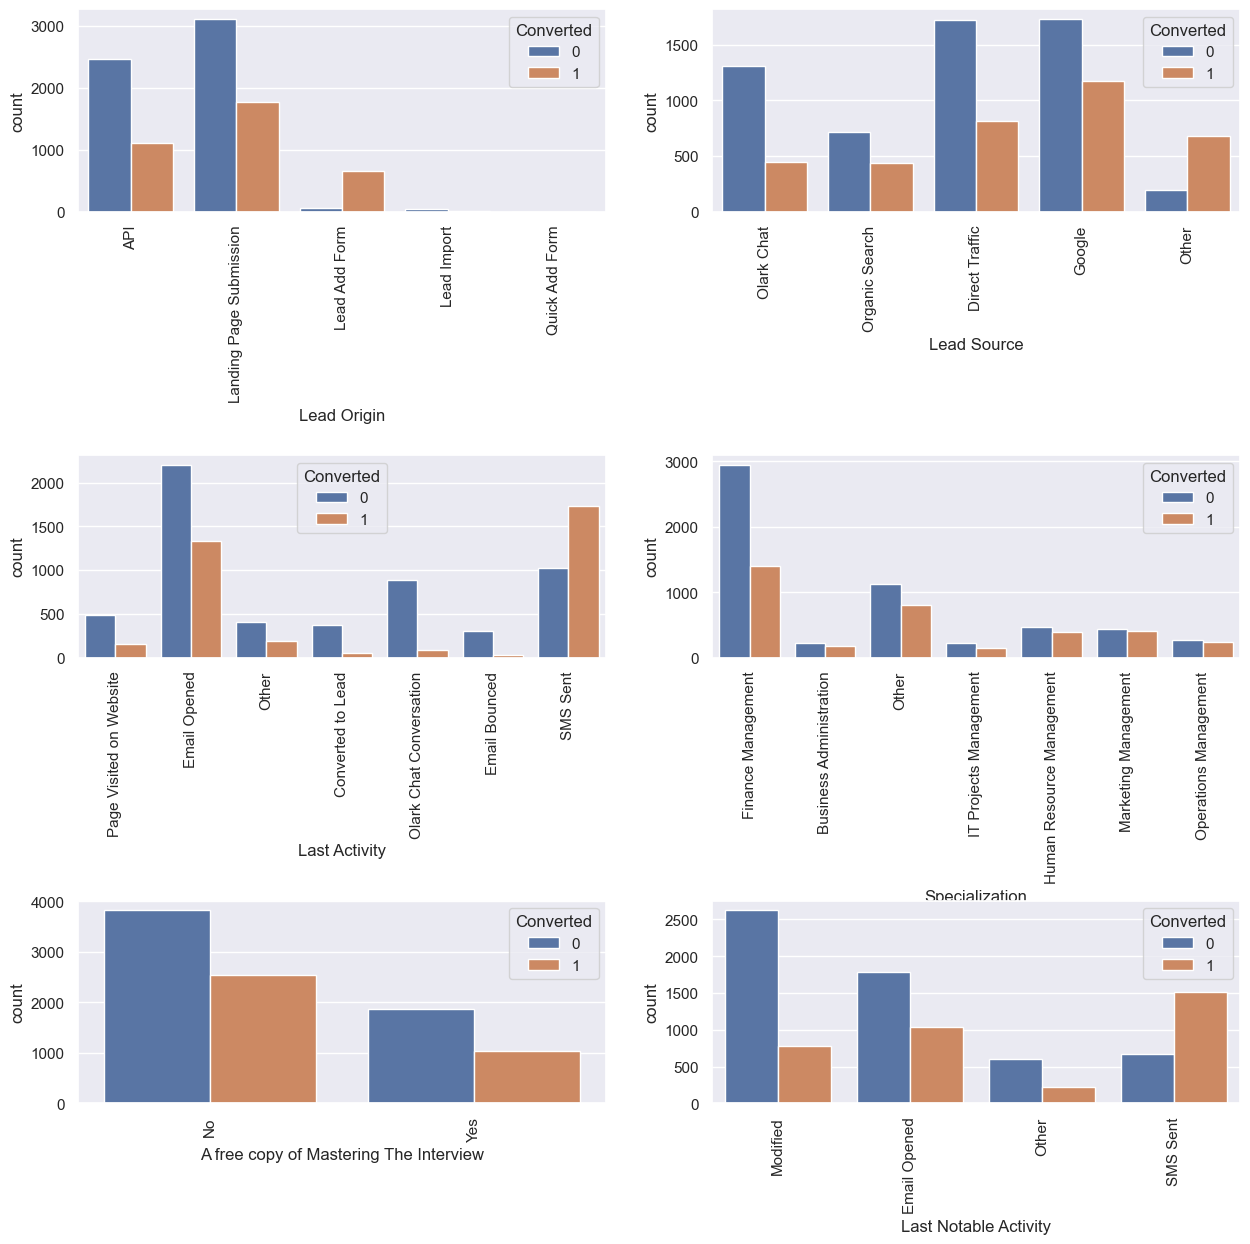

In [290]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=0.2, hspace=1.2)

# loop through each categorical column and create a count plot
for i in enumerate(cols_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = leads)
    plt.xticks(rotation = 90)
plt.show()      

## STEP 4: DATA PREPARATION AND FEATURE SELECTION

In [292]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [293]:
# maping of columns

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(lambda x:1 if x=='Yes' else 0)  

In [294]:
# droping the last Notable Activity as it is mostly same last activity

leads.drop('Last Notable Activity',axis=1,inplace=True)

Creating dummies of Categorical Variables

In [296]:
# Generate dummy variables and convert them to integer type
dummies_leads = pd.get_dummies(leads).astype(int)

# Display the first 5 rows to check the result
dummies_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
660728,0,5,674,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660727,1,2,1532,2,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660719,0,1,305,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
660681,1,2,1428,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [297]:
# droping columns from dummies_leads

dummies_leads = dummies_leads.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],axis=1)

### Splitting the data into Training and Testing Sets

In [299]:
X = dummies_leads.iloc[:,1:]
y = dummies_leads[['Converted']]

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

## Scaling the Features

In [302]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']])

## Correlation

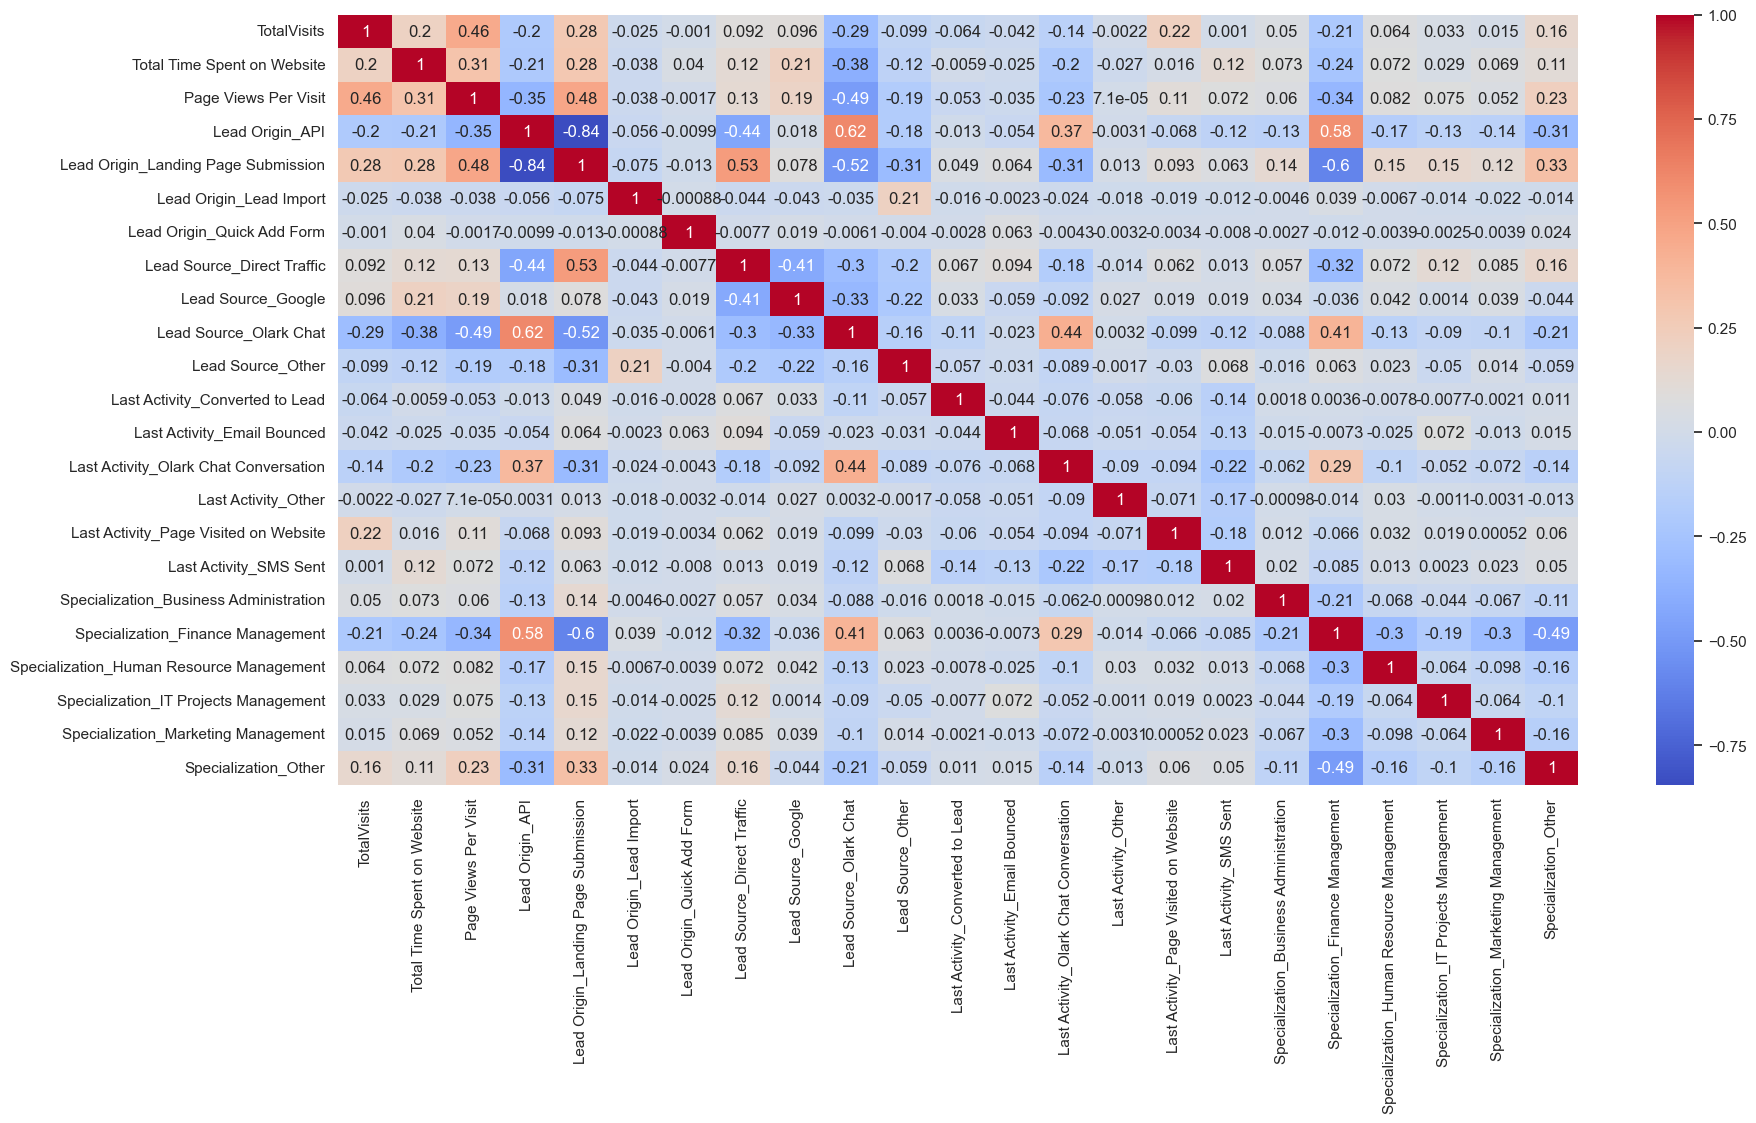

In [304]:
# Finding the correlation usong Heatmap

plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

- We can see some columns are highly correlated
-  Let RFE will decide to drop columns or not

In [306]:
# using RFE for feature selection

logreg = LogisticRegression()

In [307]:
# Running RFE with the output number of the variable equal to 20

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logreg = LogisticRegression()

# Running RFE with the estimator and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit the RFE model to the training data
rfe = rfe.fit(X_train, y_train)

In [308]:
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [309]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True])

In [310]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', False, 2),
 ('Specialization_Marketing Management', False, 4),
 ('Specialization_Other', True, 1)]

In [311]:
# used RFE here RFE selected these variables should be used for modeling

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Other',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management', 'Specialization_Other'],
      dtype='object')

In [312]:
# used RFE here RFE select these variables should not be used for modeling

X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Specialization_IT Projects Management',
       'Specialization_Marketing Management'],
      dtype='object')

## STEP 5: BUILDING A LOGISTIC REGRESSION USING STATSMODEL, FOR THE DETAILED STATISTICS

### Model 1

In [315]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.7
Date:                Tue, 17 Sep 2024   Deviance:                       5811.4
Time:                        20:05:24   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3501
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.1550      0.319      9.903      0.000       2.531       3.779
TotalVisits                                  0.1812      0.054      3.333      0.001       0.075       0.288
Total Time Spent on Website                  1.1058      0.038     28.763      0.000       1.030       1.181
Page Views Per Visit                        -0.1543      0.049     -3.143      0.002      -0.251      -0.058
Lead Origin_API                             -3.7299      0.300    -12.416      0.000      -4.319      -3.141
Lead Origin_Landing Page Submission         -4.0334      0.309    -13.039      0.000      -4.640      -3.427
Lead Origin_Lead Import                     -3.7916      0.500     -7.590      0.000      -4.771      -2.812
Lead Source_Direct Traffic                  -0.2465      0.119     -2.072      0.038      -0.480      -0.013
Lead Source_Google                           0.1146      0.109      1.047      0.295      -0.100       0.329
Lead Source_Olark Chat                       1.0149      0.157      6.466      0.000       0.707       1.323
Lead Source_Other                            0.0733      0.259      0.282      0.778      -0.435       0.582
Last Activity_Converted to Lead             -1.0779      0.200     -5.394      0.000      -1.470      -0.686
Last Activity_Email Bounced                 -1.8663      0.280     -6.660      0.000      -2.415      -1.317
Last Activity_Olark Chat Conversation       -1.7828      0.168    -10.612      0.000      -2.112      -1.454
Last Activity_Other                         -0.2686      0.137     -1.964      0.050      -0.537      -0.001
Last Activity_Page Visited on Website       -0.7453      0.148     -5.049      0.000      -1.035      -0.456
Last Activity_SMS Sent                       1.0891      0.075     14.550      0.000       0.942       1.236
Specialization_Business Administration      -0.2325      0.165     -1.407      0.159      -0.556       0.091
Specialization_Finance Management           -0.5760      0.102     -5.621      0.000      -0.777      -0.375
Specialization_Human Resource Management    -0.1515      0.129     -1.176      0.239      -0.404       0.101
Specialization_Other                        -0.1511      0.103     -1.474      0.140      -0.352       0.050
============================================================================================================
"""

In [316]:
# Function to calculate VIF
def vifcalc(df):
    vif = pd.DataFrame()
    
    # Store the feature names
    vif['Features'] = df.columns
    
    # Calculate VIF for each feature
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Round the VIF values to 2 decimal places
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Sort the DataFrame by VIF values in descending order
    vif = vif.sort_values(by="VIF", ascending=False)
    
    return vif

In [317]:
# calculating the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,8.36
3,Lead Origin_API,7.03
17,Specialization_Finance Management,4.45
8,Lead Source_Olark Chat,4.35
6,Lead Source_Direct Traffic,3.64
7,Lead Source_Google,3.42
19,Specialization_Other,2.09
2,Page Views Per Visit,1.89
15,Last Activity_SMS Sent,1.72
12,Last Activity_Olark Chat Conversation,1.56


Lead Source_Other is insignificant because it has high p-value in presence of other variables so it should be dropped

In [319]:
col = col.drop('Lead Source_Other', 1)

### Mobel 2 

In [321]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.8
Date:                Tue, 17 Sep 2024   Deviance:                       5811.5
Time:                        20:05:26   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3500
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.2253      0.199     16.213      0.000       2.835       3.615
TotalVisits                                  0.1816      0.054      3.351      0.001       0.075       0.288
Total Time Spent on Website                  1.1056      0.038     28.765      0.000       1.030       1.181
Page Views Per Visit                        -0.1546      0.049     -3.149      0.002      -0.251      -0.058
Lead Origin_API                             -3.7894      0.215    -17.636      0.000      -4.211      -3.368
Lead Origin_Landing Page Submission         -4.0949      0.221    -18.560      0.000      -4.527      -3.662
Lead Origin_Lead Import                     -3.7897      0.499     -7.588      0.000      -4.768      -2.811
Lead Source_Direct Traffic                  -0.2546      0.115     -2.205      0.027      -0.481      -0.028
Lead Source_Google                           0.1053      0.104      1.010      0.313      -0.099       0.310
Lead Source_Olark Chat                       1.0042      0.152      6.596      0.000       0.706       1.303
Last Activity_Converted to Lead             -1.0787      0.200     -5.399      0.000      -1.470      -0.687
Last Activity_Email Bounced                 -1.8688      0.280     -6.667      0.000      -2.418      -1.319
Last Activity_Olark Chat Conversation       -1.7825      0.168    -10.611      0.000      -2.112      -1.453
Last Activity_Other                         -0.2676      0.137     -1.957      0.050      -0.536       0.000
Last Activity_Page Visited on Website       -0.7447      0.148     -5.046      0.000      -1.034      -0.455
Last Activity_SMS Sent                       1.0879      0.075     14.559      0.000       0.941       1.234
Specialization_Business Administration      -0.2328      0.165     -1.409      0.159      -0.557       0.091
Specialization_Finance Management           -0.5759      0.102     -5.621      0.000      -0.777      -0.375
Specialization_Human Resource Management    -0.1515      0.129     -1.177      0.239      -0.404       0.101
Specialization_Other                        -0.1522      0.102     -1.486      0.137      -0.353       0.049
============================================================================================================
"""

In [322]:
# calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,8.30
3,Lead Origin_API,6.88
8,Lead Source_Olark Chat,4.13
16,Specialization_Finance Management,3.71
6,Lead Source_Direct Traffic,3.55
7,Lead Source_Google,3.32
18,Specialization_Other,1.92
2,Page Views Per Visit,1.83
14,Last Activity_SMS Sent,1.65
11,Last Activity_Olark Chat Conversation,1.55


Specialization_Human Resource Management is insignificant because it has high p-value in presence of other variables so it should be dropped

In [324]:
col = col.drop('Specialization_Human Resource Management', 1)

### Model 3

In [326]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.4
Date:                Tue, 17 Sep 2024   Deviance:                       5812.9
Time:                        20:05:27   Pearson chi2:                 6.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3499
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.1685      0.193     16.426      0.000       2.790       3.547
TotalVisits                                0.1798      0.054      3.325      0.001       0.074       0.286
Total Time Spent on Website                1.1046      0.038     28.762      0.000       1.029       1.180
Page Views Per Visit                      -0.1550      0.049     -3.155      0.002      -0.251      -0.059
Lead Origin_API                           -3.7819      0.215    -17.614      0.000      -4.203      -3.361
Lead Origin_Landing Page Submission       -4.0886      0.221    -18.539      0.000      -4.521      -3.656
Lead Origin_Lead Import                   -3.7912      0.500     -7.589      0.000      -4.770      -2.812
Lead Source_Direct Traffic                -0.2521      0.115     -2.185      0.029      -0.478      -0.026
Lead Source_Google                         0.1052      0.104      1.008      0.313      -0.099       0.310
Lead Source_Olark Chat                     1.0017      0.152      6.581      0.000       0.703       1.300
Last Activity_Converted to Lead           -1.0790      0.200     -5.403      0.000      -1.470      -0.688
Last Activity_Email Bounced               -1.8608      0.280     -6.641      0.000      -2.410      -1.312
Last Activity_Olark Chat Conversation     -1.7787      0.168    -10.594      0.000      -2.108      -1.450
Last Activity_Other                       -0.2685      0.137     -1.965      0.049      -0.536      -0.001
Last Activity_Page Visited on Website     -0.7479      0.148     -5.067      0.000      -1.037      -0.459
Last Activity_SMS Sent                     1.0894      0.075     14.580      0.000       0.943       1.236
Specialization_Business Administration    -0.1822      0.160     -1.142      0.254      -0.495       0.131
Specialization_Finance Management         -0.5265      0.094     -5.631      0.000      -0.710      -0.343
Specialization_Other                      -0.1019      0.093     -1.094      0.274      -0.284       0.081
==========================================================================================================
"""

In [327]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,7.68
3,Lead Origin_API,6.57
8,Lead Source_Olark Chat,4.12
6,Lead Source_Direct Traffic,3.55
16,Specialization_Finance Management,3.32
7,Lead Source_Google,3.32
2,Page Views Per Visit,1.82
17,Specialization_Other,1.70
14,Last Activity_SMS Sent,1.64
11,Last Activity_Olark Chat Conversation,1.55


Lead Source_Google is insignificant because it has high p-value in presence of other variables so it should be dropped

In [329]:
col = col.drop('Lead Source_Google',1)

### Model 4

In [331]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.0
Date:                Tue, 17 Sep 2024   Deviance:                       5813.9
Time:                        20:05:29   Pearson chi2:                 6.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3498
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.1688      0.193     16.422      0.000       2.791       3.547
TotalVisits                                0.1741      0.053      3.277      0.001       0.070       0.278
Total Time Spent on Website                1.1057      0.038     28.805      0.000       1.031       1.181
Page Views Per Visit                      -0.1624      0.049     -3.343      0.001      -0.258      -0.067
Lead Origin_API                           -3.7038      0.200    -18.515      0.000      -4.096      -3.312
Lead Origin_Landing Page Submission       -4.0035      0.204    -19.667      0.000      -4.403      -3.605
Lead Origin_Lead Import                   -3.7892      0.500     -7.585      0.000      -4.768      -2.810
Lead Source_Direct Traffic                -0.3296      0.086     -3.837      0.000      -0.498      -0.161
Lead Source_Olark Chat                     0.9178      0.127      7.216      0.000       0.669       1.167
Last Activity_Converted to Lead           -1.0887      0.199     -5.459      0.000      -1.480      -0.698
Last Activity_Email Bounced               -1.8659      0.280     -6.674      0.000      -2.414      -1.318
Last Activity_Olark Chat Conversation     -1.7781      0.168    -10.592      0.000      -2.107      -1.449
Last Activity_Other                       -0.2681      0.137     -1.961      0.050      -0.536      -0.000
Last Activity_Page Visited on Website     -0.7457      0.147     -5.058      0.000      -1.035      -0.457
Last Activity_SMS Sent                     1.0883      0.075     14.568      0.000       0.942       1.235
Specialization_Business Administration    -0.1831      0.160     -1.148      0.251      -0.496       0.130
Specialization_Finance Management         -0.5307      0.093     -5.679      0.000      -0.714      -0.348
Specialization_Other                      -0.1139      0.092     -1.233      0.218      -0.295       0.067
==========================================================================================================
"""

In [332]:
# calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.37
4,Lead Origin_Landing Page Submission,4.16
15,Specialization_Finance Management,3.32
7,Lead Source_Olark Chat,2.85
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.77
16,Specialization_Other,1.67
13,Last Activity_SMS Sent,1.64
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.34


Specialization_Business Administration is insignificant because it has high p_value in presence of other variables so it should be dropped

In [334]:
col = col.drop('Specialization_Business Administration',1)

### Model 5

In [336]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.6
Date:                Tue, 17 Sep 2024   Deviance:                       5815.2
Time:                        20:05:30   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3497
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1431      0.192     16.408      0.000       2.768       3.519
TotalVisits                               0.1726      0.053      3.267      0.001       0.069       0.276
Total Time Spent on Website               1.1049      0.038     28.793      0.000       1.030       1.180
Page Views Per Visit                     -0.1621      0.049     -3.337      0.001      -0.257      -0.067
Lead Origin_API                          -3.7008      0.200    -18.505      0.000      -4.093      -3.309
Lead Origin_Landing Page Submission      -4.0049      0.204    -19.676      0.000      -4.404      -3.606
Lead Origin_Lead Import                  -3.7909      0.499     -7.592      0.000      -4.770      -2.812
Lead Source_Direct Traffic               -0.3281      0.086     -3.820      0.000      -0.496      -0.160
Lead Source_Olark Chat                    0.9156      0.127      7.200      0.000       0.666       1.165
Last Activity_Converted to Lead          -1.0901      0.199     -5.470      0.000      -1.481      -0.699
Last Activity_Email Bounced              -1.8627      0.280     -6.663      0.000      -2.411      -1.315
Last Activity_Olark Chat Conversation    -1.7786      0.168    -10.594      0.000      -2.108      -1.449
Last Activity_Other                      -0.2653      0.137     -1.941      0.052      -0.533       0.003
Last Activity_Page Visited on Website    -0.7486      0.147     -5.076      0.000      -1.038      -0.460
Last Activity_SMS Sent                    1.0879      0.075     14.567      0.000       0.942       1.234
Specialization_Finance Management        -0.5063      0.091     -5.562      0.000      -0.685      -0.328
Specialization_Other                     -0.0870      0.089     -0.973      0.330      -0.262       0.088
=========================================================================================================
"""

In [337]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.28
4,Lead Origin_Landing Page Submission,3.91
14,Specialization_Finance Management,3.19
7,Lead Source_Olark Chat,2.85
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.76
13,Last Activity_SMS Sent,1.63
15,Specialization_Other,1.59
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.34


Specialization_Other is insignificant because it has high p-value in presence of other variables so it should be dropped

In [339]:
col = col.drop('Specialization_Other',1)

### Model 6

In [341]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.1
Date:                Tue, 17 Sep 2024   Deviance:                       5816.2
Time:                        20:05:31   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3496
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1104      0.188     16.504      0.000       2.741       3.480
TotalVisits                               0.1705      0.053      3.246      0.001       0.068       0.273
Total Time Spent on Website               1.1056      0.038     28.813      0.000       1.030       1.181
Page Views Per Visit                     -0.1648      0.049     -3.395      0.001      -0.260      -0.070
Lead Origin_API                          -3.6978      0.200    -18.498      0.000      -4.090      -3.306
Lead Origin_Landing Page Submission      -4.0044      0.203    -19.678      0.000      -4.403      -3.606
Lead Origin_Lead Import                  -3.7956      0.500     -7.596      0.000      -4.775      -2.816
Lead Source_Direct Traffic               -0.3278      0.086     -3.817      0.000      -0.496      -0.159
Lead Source_Olark Chat                    0.9117      0.127      7.175      0.000       0.663       1.161
Last Activity_Converted to Lead          -1.0957      0.199     -5.499      0.000      -1.486      -0.705
Last Activity_Email Bounced              -1.8665      0.280     -6.673      0.000      -2.415      -1.318
Last Activity_Olark Chat Conversation    -1.7804      0.168    -10.606      0.000      -2.109      -1.451
Last Activity_Other                      -0.2637      0.137     -1.930      0.054      -0.531       0.004
Last Activity_Page Visited on Website    -0.7516      0.147     -5.097      0.000      -1.041      -0.463
Last Activity_SMS Sent                    1.0855      0.075     14.545      0.000       0.939       1.232
Specialization_Finance Management        -0.4744      0.085     -5.586      0.000      -0.641      -0.308
=========================================================================================================
"""

In [342]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.06
4,Lead Origin_Landing Page Submission,3.37
14,Specialization_Finance Management,2.86
7,Lead Source_Olark Chat,2.85
6,Lead Source_Direct Traffic,2.01
2,Page Views Per Visit,1.76
13,Last Activity_SMS Sent,1.62
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.33
1,Total Time Spent on Website,1.26


- Here we got all the p-value are under 0.05 and VIF is also under 5
- It can take as a Final Model

In [344]:
# Prediciting values on y_train

y_train_pred = logm6.predict(X_train_sm).values.reshape(-1)

In [345]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.153561,609431
1,0,0.054616,631817
2,0,0.063717,596164
3,0,0.157191,646570
4,0,0.036816,643974


In [346]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)


In [347]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.153561,609431,0
1,0,0.054616,631817,0
2,0,0.063717,596164,0
3,0,0.157191,646570,0
4,0,0.036816,643974,0


In [348]:
# Finding the metrics like accuracy, sensitivity and specificity

def metrics_(converted, predicted):
    cm = metrics.confusion_matrix(converted, predicted)
    total = cm.sum()
     # Accuracy: (TP + TN) / Total
    accuracy = (cm[0,0] + cm[1,1]) / total

     # Specificity: TN / (TN + FP)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1]) 

     # sensitivity(recall) : TP / (TP +FN)
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])

    return accuracy, sensitivity, specificity

In [349]:
accuracy, sensitivity, specificity = metrics_(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity: {}, specificity: {}'.format(accuracy, sensitivity, specificity))

Accuracy: 0.7999381570810142, Sensitivity: 0.680859691808597, specificity: 0.8733133433283359


Here we got low Sensitivity when randomly take the cutoff as 0.5

In [351]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3495,  507],
       [ 787, 1679]], dtype=int64)

In [352]:
# Finding the TP, TN, FP, FN

TP = confusion[1,1]  # TRUE POSITIVE
TN = confusion[0,0]  # TRUE NEGATIVE
FP = confusion[0,1]  # FALSE POSOTIVE
FN = confusion[1,0]  # FALSE NEGATIVE

In [353]:
# calculate FALSE POSOTIVE rate
print(FP/ float(TN+FP))

0.12668665667166418


In [354]:
# calculate positive predictive value

print(TP / float(TP+FP))

0.7680695333943275


In [355]:
# calculate negative predictive value

print( TN / float(TN+FN))

0.8162073797290985


In [356]:
# ROC courve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
#     plt.savefig('Roc.png',dpi=300,transparent=True)
    plt.show()
    

    return None

In [357]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


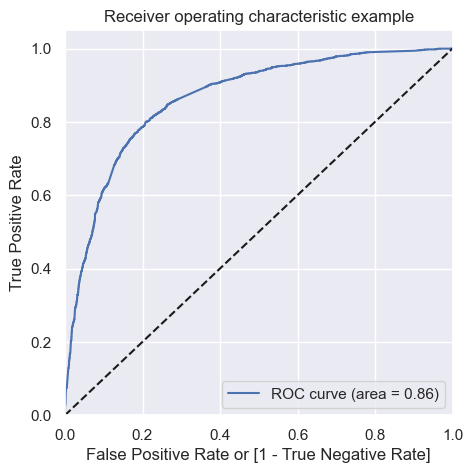

In [358]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## FINDING THE OPTIMAL POINT

In [360]:
# lets create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()
    

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.153561,609431,0,1,1,0,0,0,0,0,0,0,0
1,0,0.054616,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.063717,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.157191,646570,0,1,1,0,0,0,0,0,0,0,0
4,0,0.036816,643974,0,1,0,0,0,0,0,0,0,0,0


In [361]:
# now lets calculate accuracy , sensitivity and specificity for various probability cutoffs

cutoff_leads = pd.DataFrame( columns = ['probability', 'accuracy', 'sensitivity', 'specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0, 0.1, 0.2, 0.3, 0.4,	0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    specificity = cm[0,0]/(cm[0,0] + cm[0,1])
    sensitivity = cm[1,1]/ (cm[1,0] + cm[1,1])
    cutoff_leads.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_leads)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.572047     0.971614     0.325837
0.2          0.2  0.699289     0.918897     0.563968
0.3          0.3  0.780148     0.833333     0.747376
0.4          0.4  0.801948     0.753852     0.831584
0.5          0.5  0.799938     0.680860     0.873313
0.6          0.6  0.782004     0.564882     0.915792
0.7          0.7  0.756648     0.454988     0.942529
0.8          0.8  0.733302     0.359286     0.963768
0.9          0.9  0.675170     0.170316     0.986257


<Figure size 1000x600 with 0 Axes>

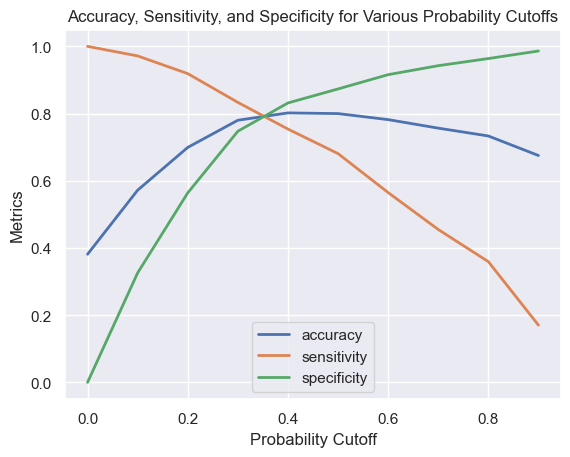

In [362]:
# lets plot accuracy sensitivity ans specificity for various probabilities

plt.figure(figsize=(10, 6))
cutoff_leads.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'], linewidth=2)

# Add title and labels
plt.title('Accuracy, Sensitivity, and Specificity for Various Probability Cutoffs')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.grid(True)

# Show the plot
plt.show()

Taking value 0.37 is the Final Cutoff

In [364]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.153561,609431,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.054616,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.063717,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.157191,646570,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.036816,643974,0,1,0,0,0,0,0,0,0,0,0,0


In [365]:
# Printing the metrics accuracy, sensitivity, specificity

# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion


array([[3495,  507],
       [ 787, 1679]], dtype=int64)

In [366]:
# Finding the precision score

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7134372680029696

In [367]:
# Finding the REcall Score

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7793998377939984

In [368]:
# here p is precesion
# here r is recall 

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

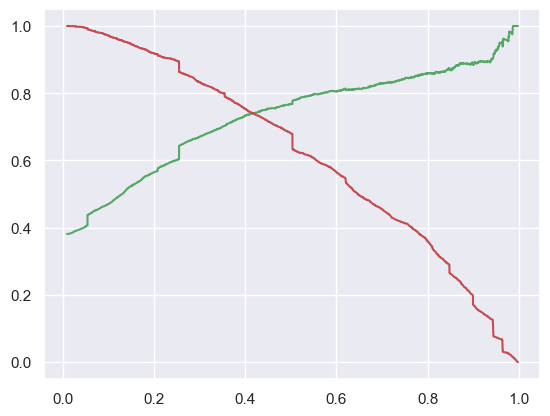

In [369]:
plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = "Recall")
plt.savefig('precision-recall_curve',dpi=300,transparent=True)
plt.show()

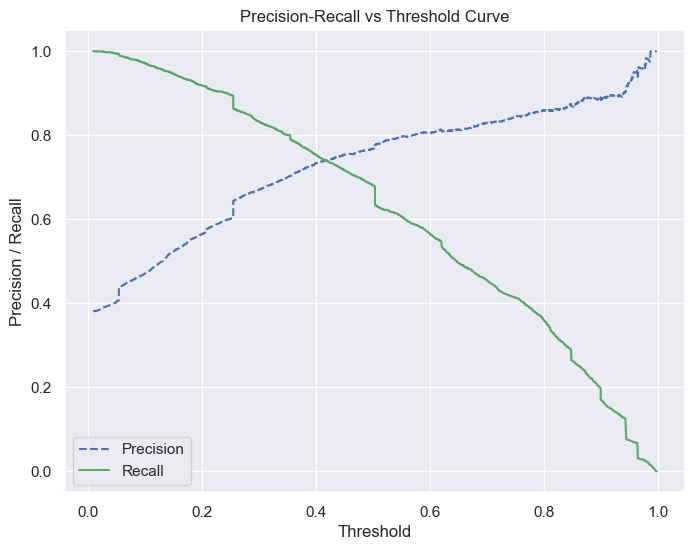

In [370]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision, recall, and threshold values
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], 'b--', label='Precision')
plt.plot(thresholds, r[:-1], 'g-', label='Recall')

plt.title('Precision-Recall vs Threshold Curve')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Here we got 0.41 as the Cut-off as Precesion-Recall Threshold

## MAKING PREDICTION ON TEST SET

Scaling on Test Set

In [374]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [375]:
# Adding constant

X_test_sm = sm.add_constant(X_test[col])

# Making prediction

y_test_pred = logm6.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.872805
590711    0.878506
644174    0.490461
641392    0.286914
587955    0.848743
593130    0.153196
648319    0.054616
636722    0.945068
648231    0.812148
637858    0.217352
dtype: float64

In [376]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_leads = pd.DataFrame(y_test)
y_test_leads['Lead Number'] = y_test_leads.index


In [377]:
# Removing index for both dataframe to append them side by side

y_pred_test.reset_index(drop=True, inplace=True)
y_test_leads.reset_index(drop=True, inplace=True)

In [378]:
# Appending y_test_leads and y_pred_test
y_pred_final = pd.concat([y_test_leads, y_pred_test], axis=1)

# Renaming the column
y_pred_final = y_pred_final.rename(columns={ 0 : "Converted_Prob"})

In [379]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.872805
1,1,590711,0.878506
2,1,644174,0.490461
3,0,641392,0.286914
4,1,587955,0.848743


In [380]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [381]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,639211,0.872805,1
1,1,590711,0.878506,1
2,1,644174,0.490461,1
3,0,641392,0.286914,0
4,1,587955,0.848743,1


In [382]:
accuracy,sensitivity,specificity = metrics_(y_pred_final.Converted, y_pred_final.final_test_predicted)

In [383]:
print('Accuracy: {}, Sensitivity: {}, specitiy: {} '.format(accuracy,sensitivity,specificity))

Accuracy: 0.7846320346320347, Sensitivity: 0.7671232876712328, specitiy: 0.7960644007155635 


- We can see that our model is doing well in test set.
- Sensitivity means how our model is telling that actually converted and predected them as converted.
- We can see that our model is giving about 0.76 sensitivity.
- It means that 76 percent time our model is able to predict actully converted as predicted converted.

## ASSIGNING LEAD SCORE IN THE DATA FRAME WITH RESPECT TO LEAD NUMBER

In [386]:
# making new df with Lead Score

lead_score_df = pd.DataFrame()
df1 = y_train_pred_final[['Lead Number','Converted_Prob']]
df2 = y_pred_final[['Lead Number','Converted_Prob']]

In [387]:
lead_score_df = pd.concat([df1, df2], ignore_index=True)

In [388]:
# Assigning the value to the Lead Score by Multiplying 100

lead_score_df['Lead Score']=lead_score_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [389]:
# dropping Converted_Prob

lead_score_df.drop('Converted_Prob', axis=1,inplace=True)
lead_score_df.head()

,Lead Number,Lead Score
0,609431,15.36
1,631817,5.46
2,596164,6.37
3,646570,15.72
4,643974,3.68


- Got tha Lead Score with respect to Lead Number

In [391]:
leads

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview
Lead Number,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Finance Management,0
660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Finance Management,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,1
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Other,Other,0
660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Finance Management,0
...,...,...,...,...,...,...,...,...,...
579564,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Other,IT Projects Management,0
579546,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Other,1
579545,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,1


* We have noted that the variables that important the most in the potential buyers are:
* Total Time Spent on Website
* TotalVisits
* The lead source was : a)Google b)Direct Traffic c)Organic Search d)Olark Chat
* Lead origin is Lead add format